# **Importing Libraries**

In [1]:
import re
import nltk
import spacy
import time
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from lime import lime_text
from lime.lime_text import LimeTextExplainer
warnings.filterwarnings('ignore')

In [2]:
warnings.filterwarnings("ignore", category=UserWarning)

# **Read dataset**

In [3]:
df = pd.read_csv("/kaggle/input/sentiment/Sentiment_Data.csv", encoding='LATIN1', nrows=10000)
df.head()

,Tweet,Sentiment
0,@_angelica_toy Happy Anniversary!!!....The Day...,Mild_Pos
1,@McfarlaneGlenda Happy Anniversary!!!....The D...,Mild_Pos
2,@thevivafrei @JustinTrudeau Happy Anniversary!...,Mild_Pos
3,@NChartierET Happy Anniversary!!!....The Day t...,Mild_Pos
4,@tabithapeters05 Happy Anniversary!!!....The D...,Mild_Pos


# **Shape of Dataset**

In [4]:
df.shape

(10000, 2)

# **Information of Dataset**

In [5]:
df.info

<bound method DataFrame.info of                                                   Tweet   Sentiment
0     @_angelica_toy Happy Anniversary!!!....The Day...    Mild_Pos
1     @McfarlaneGlenda Happy Anniversary!!!....The D...    Mild_Pos
2     @thevivafrei @JustinTrudeau Happy Anniversary!...    Mild_Pos
3     @NChartierET Happy Anniversary!!!....The Day t...    Mild_Pos
4     @tabithapeters05 Happy Anniversary!!!....The D...    Mild_Pos
...                                                 ...         ...
9995  @rmyers1000 @garymasonglobe The release of the...  Strong_Pos
9996  @Captaincoby00 Only misinformed delusional vot...     Neutral
9997  âI am so sick of these weekend warrior freed...     Neutral
9998  Classic big media moves: Donât bother coveri...  Strong_Pos
9999  Exactly why the freedom convoy happened. To tr...    Mild_Pos

[10000 rows x 2 columns]>

# **Unique Values in Dataset**

In [6]:
unique_values = df['Sentiment'].unique()
print("Unique values in column 'column_name':", unique_values)

Unique values in column 'column_name': ['Mild_Pos' 'Strong_Pos' 'Neutral' 'Strong_Neg' 'Mild_Neg']


# **Count of each unique values in Dataset**


In [8]:
sen_counts = df.groupby('Sentiment').size()
print("Count of each unique value in 'Sentiment' column:")
print(sen_counts)

Count of each unique value in 'Sentiment' column:
Sentiment
Mild_Neg       713
Mild_Pos      1273
Neutral       1674
Strong_Neg     904
Strong_Pos    5436
dtype: int64


# **Vsualization of column 'Sentiment'**

Summary statistics for Sentiment:
count          10000
unique             5
top       Strong_Pos
freq            5436
Name: Sentiment, dtype: object




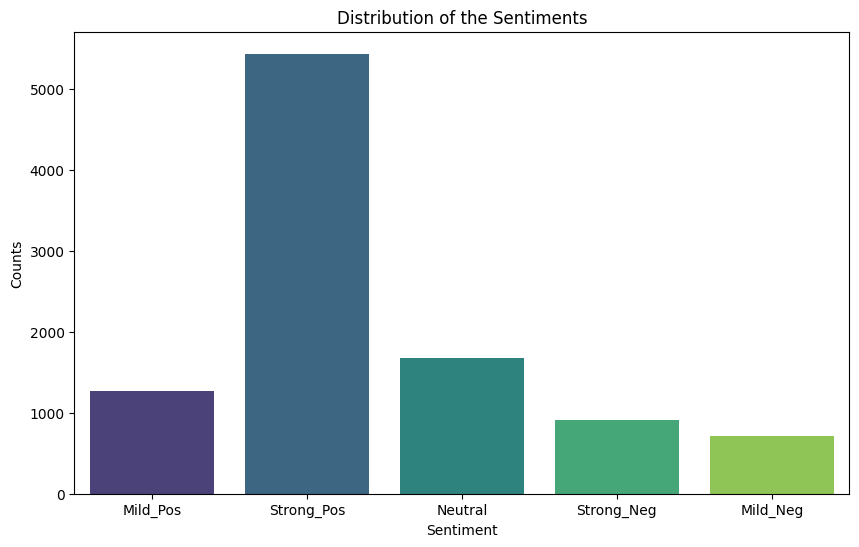

In [9]:
c_name = 'Sentiment'

# Basic info of the column
print(f"Summary statistics for {c_name}:")
print(df[c_name].describe())

print('\n')
#distribution of the Sentiment column
plt.figure(figsize=(10, 6))
sns.countplot(x=c_name, data=df, palette='viridis')
plt.title(f'Distribution of the Sentiments')
plt.xlabel(c_name)
plt.ylabel('Counts')
plt.show()

# **Read Dataset Slang.csv**

In [10]:
# Reference- https://www.kaggle.com/datasets/gowrishankarp/chat-slang-abbreviations-acronyms 
slang_df = pd.read_csv('/kaggle/input/slangs/slang.csv')

print(slang_df.columns)
print('/n')
print(slang_df.head())

Index(['acronym', 'expansion'], dtype='object')
/n
  acronym            expansion
0    2day                today
1    2m2h  too much too handle
2   2moro             tomorrow
3   2nite              tonight
4    4eae    for ever and ever


# **Data Cleaning, Removing Slangs, Tokenization & Lemmatization**

In [11]:
# Loading English model using spacy library
nlp = spacy.load("en_core_web_sm")

# Start time calculation
start_time = time.time()

# Defining the clean_text function.
def clean_text(tweet):
    tweet = tweet.lower()  # This will will change text to Lowercase
    tweet = re.sub(r'\d+', '', tweet)  # This will Remove numbers
    tweet = re.sub(r'[^\w\s]', '', tweet)  # This will Remove punctuation
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # This will Remove extra spaces
    return tweet

# clean_text function to the 'Tweet' column
df['cleaned_text'] = df['Tweet'].apply(clean_text)

# Creating the slang dictionary
slang_dict = pd.Series(slang_df.expansion.values, index=slang_df.acronym).to_dict()

# defined function swap slangs inside a text
def replace_slangs(text, slang_dict):
    # C
    words = text.split()
    replaced_text = ' '.join([slang_dict.get(word, word) for word in words])
    return replaced_text

# Applying the slang replacement
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: replace_slangs(x, slang_dict))

# Function declared to tokenize text using spaCy
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Applying tokenization to the cleaned text column
df['tokenized_text'] = df['cleaned_text'].apply(tokenize_text)

# Print the first few rows of the cleaned DataFrame
print(df.head())

# Function defined to lemmatize text using spaCy library
def lemmatize_text_spacy(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Lemmatization
df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text_spacy)

# Print the first few rows of the DataFrame
print(df.head())

# End time calculation
end_time = time.time()

# Calculate duration
duration = end_time - start_time
print('\n')
# Print the duration
print("The code took {:.2f} seconds to compile.".format(duration))

<bound method DataFrame.info of                                                   Tweet   Sentiment
0     @_angelica_toy Happy Anniversary!!!....The Day...    Mild_Pos
1     @McfarlaneGlenda Happy Anniversary!!!....The D...    Mild_Pos
2     @thevivafrei @JustinTrudeau Happy Anniversary!...    Mild_Pos
3     @NChartierET Happy Anniversary!!!....The Day t...    Mild_Pos
4     @tabithapeters05 Happy Anniversary!!!....The D...    Mild_Pos
...                                                 ...         ...
9995  @rmyers1000 @garymasonglobe The release of the...  Strong_Pos
9996  @Captaincoby00 Only misinformed delusional vot...     Neutral
9997  âI am so sick of these weekend warrior freed...     Neutral
9998  Classic big media moves: Donât bother coveri...  Strong_Pos
9999  Exactly why the freedom convoy happened. To tr...    Mild_Pos

[10000 rows x 2 columns]>

# **Target Variable Encoding- LabelEncoder**

In [13]:
X = df['Tweet']
y = df['Sentiment']

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
df['Encoded_Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Print the unique classes and their corresponding numerical labels
print("Original Classes:", df['Sentiment'].unique())
print("Encoded Classes:", label_encoder.classes_)

# Use the encoded labels for y
y = df['Encoded_Sentiment']


Original Classes: ['Mild_Pos' 'Strong_Pos' 'Neutral' 'Strong_Neg' 'Mild_Neg']
Encoded Classes: ['Mild_Neg' 'Mild_Pos' 'Neutral' 'Strong_Neg' 'Strong_Pos']


# **SVM model using Count-Vectors with Unigram**

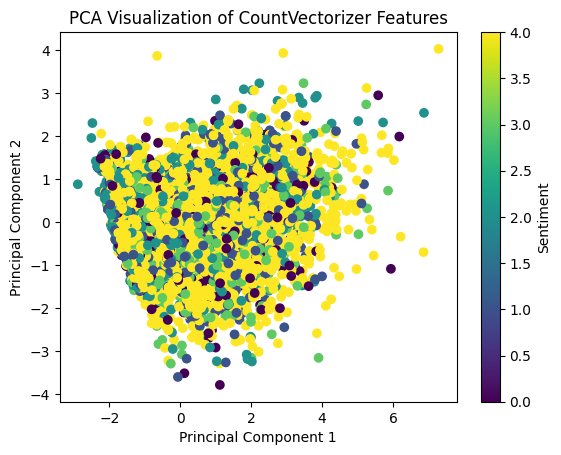

Metrics for linear kernel:
Accuracy Score: 0.6585
Confusion Matrix:
[[ 33  28  33  12  23]
 [ 16  93  30  14  91]
 [ 20  38 214  14  55]
 [ 31  29  28  64  31]
 [ 28  94  48  20 913]]
AUC Score: 0.8444300623588362
Training Accuracy: 0.99725
Test Accuracy: 0.6585
Cross-validation Scores: [0.649375 0.655625 0.65625  0.64875  0.65    ]
Average Cross-validation Score: 0.652
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.26      0.26       129
           1       0.33      0.38      0.35       244
           2       0.61      0.63      0.62       341
           3       0.52      0.35      0.42       183
           4       0.82      0.83      0.82      1103

    accuracy                           0.66      2000
   macro avg       0.51      0.49      0.49      2000
weighted avg       0.66      0.66      0.66      2000

F1 Score (Mild Positive): 0.35361216730038025
F1 Score (Strong Positive): 0.8240072202166064
F1 Score (Mild Negativ

In [14]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# PCA for visualization using CountVectorizer features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_count.toarray())
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of CountVectorizer Features')
plt.colorbar(label='Sentiment')
plt.show()

#Initialize and train SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
models = {}
training_times = {}

for kernel in kernels:
    start_time = time.time()
    svm_model = SVC(kernel=kernel, probability=True)  # Set probability=True
    svm_model.fit(X_train_count, y_train)
    end_time = time.time()
    models[kernel] = svm_model
    training_times[kernel] = end_time - start_time

# Make predictions and calculate metrics for each model
for kernel, model in models.items():
    y_pred_proba = model.predict_proba(X_test_count)  # Predict probabilities instead of labels
    y_pred = model.predict(X_test_count)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovr')  # Use predicted probabilities
    training_accuracy = model.score(X_train_count, y_train)
    test_accuracy = model.score(X_test_count, y_test)
    
    # Calculate TPR and FPR
    tpr = {}
    fpr = {}
    for i in range(len(model.classes_)):
        class_label = model.classes_[i]
        fpr[class_label], tpr[class_label], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=class_label)
    
    # Classification Report
    report = classification_report(y_test, y_pred)
    
    # F1 Scores for specific classes
    f1_neutral_label = label_encoder.transform(['Neutral'])[0]
    f1_mild_pos_label = label_encoder.transform(['Mild_Pos'])[0]
    f1_strong_pos_label = label_encoder.transform(['Strong_Pos'])[0]
    f1_mild_neg_label = label_encoder.transform(['Mild_Neg'])[0]
    f1_strong_neg_label = label_encoder.transform(['Strong_Neg'])[0]
    
    f1_neutral = f1_score(y_test, y_pred, labels=[f1_neutral_label], average='weighted', zero_division=0)
    f1_mild_pos = f1_score(y_test, y_pred, labels=[f1_mild_pos_label], average='weighted', zero_division=0)
    f1_strong_pos = f1_score(y_test, y_pred, labels=[f1_strong_pos_label], average='weighted', zero_division=0)
    f1_mild_neg = f1_score(y_test, y_pred, labels=[f1_mild_neg_label], average='weighted', zero_division=0)
    f1_strong_neg = f1_score(y_test, y_pred, labels=[f1_strong_neg_label], average='weighted', zero_division=0)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_count, y_train, cv=5, scoring='accuracy')
    avg_cv_score = np.mean(cv_scores)

    print(f"Metrics for {kernel} kernel:")
    print("Accuracy Score:", accuracy)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("AUC Score:", auc_score)
    print("Training Accuracy:", training_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Cross-validation Scores:", cv_scores)
    print("Average Cross-validation Score:", avg_cv_score)
    print("Classification Report:")
    print(report)
    print("F1 Score (Mild Positive):", f1_mild_pos)
    print("F1 Score (Strong Positive):", f1_strong_pos)
    print("F1 Score (Mild Negative):", f1_mild_neg)
    print("F1 Score (Strong Negative):", f1_strong_neg)
    print("Time taken to compile code:", training_times[kernel], "seconds")
    print()

# **Confusion Matrix**

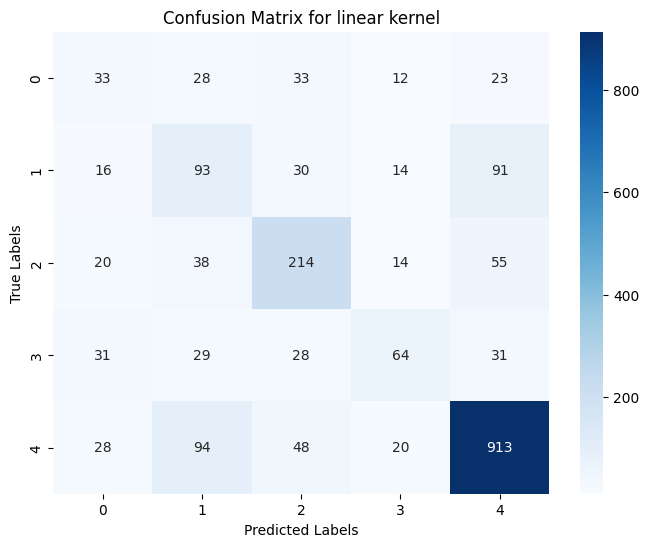

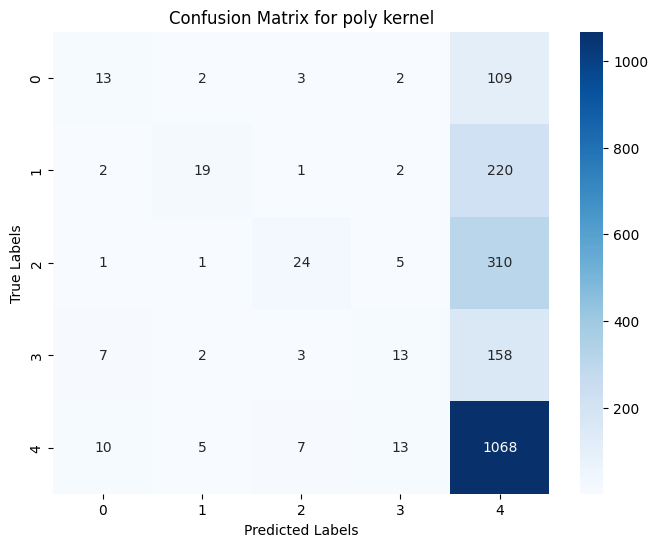

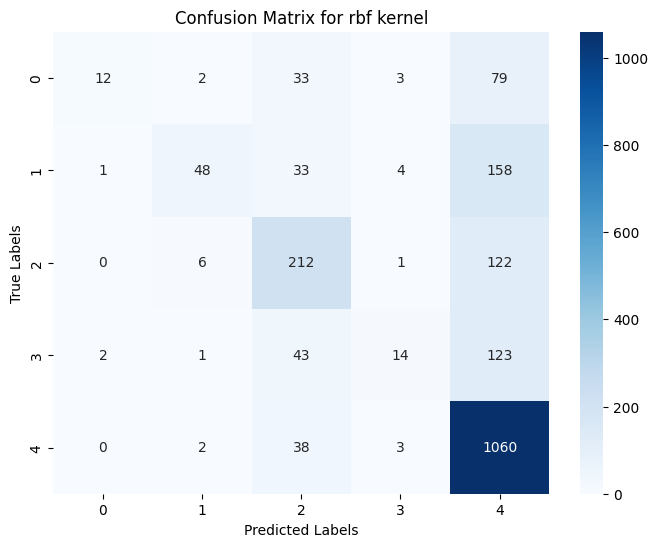

In [15]:
# Iterate over each kernel and plot confusion matrix
for kernel, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test_count)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()


# **Receiver Operating Characteristic (ROC) Curve**

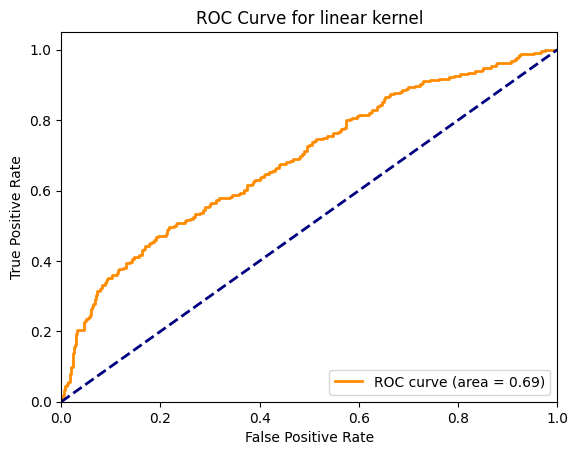

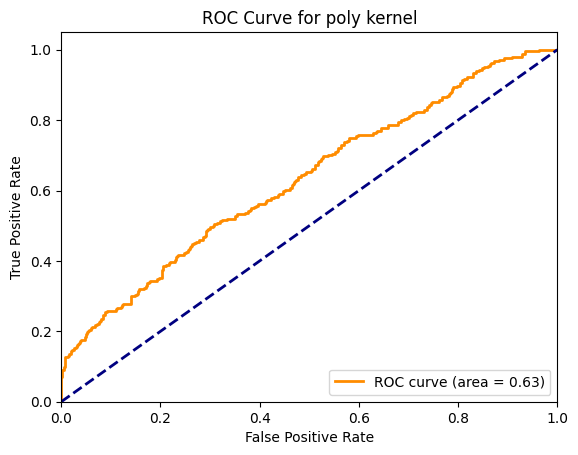

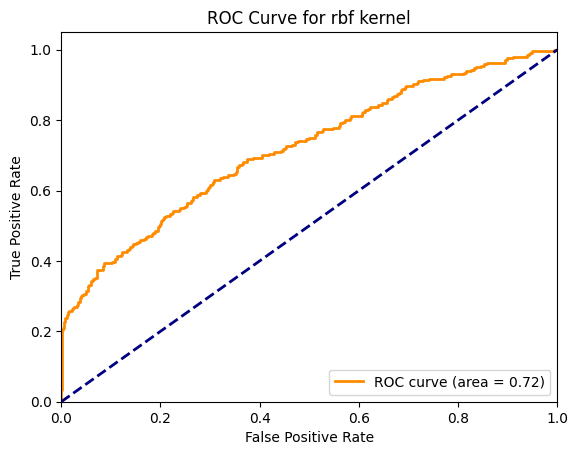

In [16]:
# Iterate over each kernel and plot confusion matrix
for kernel, model in models.items():
    # Make predictions
    y_pred_proba = model.predict_proba(X_test_count)
    
    # Convert multiclass labels to binary labels
    binary_y_test = np.where(y_test == model.classes_[1], 1, 0)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(binary_y_test, y_pred_proba[:, 1])
    roc_auc_value = auc(fpr, tpr)  # Ensure this does not conflict with the function name

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {kernel} kernel')
    plt.legend(loc="lower right")
    plt.show()


# **Interpretability-Local Interpretability Methods (LIME)**

In [17]:
from sklearn.preprocessing import LabelEncoder

# Combine the training and test labels
combined_labels = pd.concat([y_train, y_test])

# Fit the label encoder on the combined labels
label_encoder = LabelEncoder()
label_encoder.fit(combined_labels)

# Initialize LimeTextExplainer with the correct class names
explainer = LimeTextExplainer(class_names=label_encoder.classes_)

# Choose a sample text for explanation
sample_idx = 0
sample_text = X_test.iloc[sample_idx]
true_class = y_test.iloc[sample_idx]

# Convert true_class to the appropriate label index
true_class_index = label_encoder.transform([true_class])[0]

# Wrapper function to vectorize text before prediction
def predict_proba_wrapper(texts):
    # Convert the texts to vectorized format
    vectorized_texts = vectorizer.transform(texts)
    # Predict probabilities using the linear model
    return models['linear'].predict_proba(vectorized_texts)

# Explain the prediction for the sample text
explanation = explainer.explain_instance(sample_text, predict_proba_wrapper, num_features=10)

# Check if the true_class_index is valid and found in local_exp
if true_class_index < len(explanation.local_exp):
    # Display the explanation
    fig = explanation.as_pyplot_figure(label=true_class_index)
    plt.show()
else:
    print(f"Label index {true_class_index} not found in explanation.local_exp")


Label index 3 not found in explanation.local_exp
